# Twitter Sentiment Classification

# Project Overview

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

# Problem Statement

Build a model to classify whether or not a person believes in climate change, based on their novel tweet data.

# Data Description

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43,943 tweets were collected. Each tweet is labelled as one of 4 classes, which are described below.

# Class Description

2 News: the tweet links to factual news about climate change

1 Pro: the tweet supports the belief of man-made climate change

0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

-1 Anti: the tweet does not believe in man-made climate change Variable definitions

# Features

sentiment: Which class a tweet belongs in (refer to Class Description above)

message: Tweet body

tweetid: Twitter unique id

# Import Libraries

In [2]:
#Importing libraries
import pickle
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline



# Import libraries for Natural Languge Processing
import re
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from html.parser import HTMLParser
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

# Import library for Feature Extraction
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

# Import library for train test split
from sklearn.model_selection import train_test_split

# Import Machine Learning algorithms
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

# Import libraries for model evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Import warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\w5665264\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\w5665264\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Loading the datasets

In [3]:
#load datasets
Train_df=pd.read_csv('train.csv')
Test_df=pd.read_csv('test_with_no_labels.csv')

In [4]:
Train_df

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001
15815,2,RT @washingtonpost: How climate change could b...,17856
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732


In [5]:
Test_df

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928
...,...,...
10541,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714
10542,2016: the year climate change came home: Durin...,875167
10543,RT @loop_vanuatu: Pacific countries positive a...,78329
10544,"RT @xanria_00018: You’re so hot, you must be t...",867455


# Datasets Summary

In [6]:
Train_df.shape

(15819, 3)

In [7]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [8]:
Train_df.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


# Missing Values

In [9]:
Train_df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [10]:
Test_df.isnull().sum(axis=0)

message    0
tweetid    0
dtype: int64

Unfortunately there is no missing values from the datasets

In [11]:
#check duplicates
Train_df.duplicated().sum()

0

In [12]:
Test_df.duplicated().sum()

0

Unfortunately there is no duplicates

# Text Cleaning

Data cleaning is a crucial step in the machine learning (ML) pipeline, as it involves identifying and removing any missing, duplicate, or irrelevant data. The goal of data cleaning is to ensure that the data is accurate, consistent, and free of errors, as incorrect or inconsistent data can negatively impact the performance of the ML model.

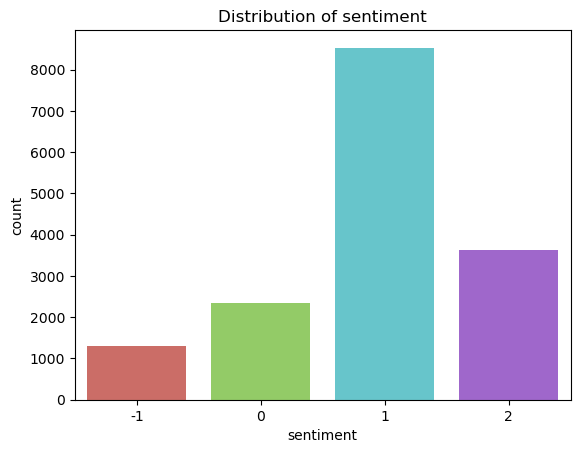

In [13]:
sns.countplot(x = 'sentiment', data = Train_df, palette="hls")
plt.title("Distribution of sentiment");

In [14]:
Train_df['sentiment']

0        1
1        1
2        2
3        1
4        1
        ..
15814    1
15815    2
15816    0
15817   -1
15818    0
Name: sentiment, Length: 15819, dtype: int64

In [40]:
raw_tweets=Train_df['message']
raw_tweets

0        PolySciMajor EPA chief doesn't think carbon di...
1        It's not like we lack evidence of anthropogeni...
2        RT @RawStory: Researchers say we have three ye...
3        #TodayinMaker# WIRED : 2016 was a pivotal year...
4        RT @SoyNovioDeTodas: It's 2016, and a racist, ...
                               ...                        
15814    RT @ezlusztig: They took down the material on ...
15815    RT @washingtonpost: How climate change could b...
15816    notiven: RT: nytimesworld :What does Trump act...
15817    RT @sara8smiles: Hey liberals the climate chan...
15818    RT @Chet_Cannon: .@kurteichenwald's 'climate c...
Name: message, Length: 15819, dtype: object

The regex library is a powerful tool for working with regular expressions in Python, offering additional features and enhancements over the standard re module. Regex is optimized for performance and often offers faster execution compared to the re module, especially for complex or large-scale regular expressions. In this case regex will be used to clean the tweets

In [41]:
# Replace email addresses with 'email'
tweets = raw_tweets.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Remove unicode strings
tweets = tweets.str.replace(r'(\\u[0-9A-Fa-f]+)', '')
tweets = tweets.str.replace(r'[^\x00-\x7f]', '')

# Convert any url to URL
tweets = tweets.str.replace('((www\.[^\s]+)|(https?://[^\s]+))',
                            'website')

# Remove special characters, numbers, punctuation
tweets = tweets.str.replace('[^a-zA-Z#@]+',' ')

# Remove additional white spaces
tweets = tweets.str.replace(r'\s+', ' ')
tweets = tweets.str.replace(r'^\s+|\s+?$', '')

# Change words to lower case
tweets = tweets.str.lower()

In [17]:
tweets

0        polyscimajor epa chief doesn t think carbon di...
1        it s not like we lack evidence of anthropogeni...
2        rt @rawstory researchers say we have three yea...
3        #todayinmaker# wired was a pivotal year in the...
4        rt @soynoviodetodas it s and a racist sexist c...
                               ...                        
15814    rt @ezlusztig they took down the material on g...
15815    rt @washingtonpost how climate change could be...
15816    notiven rt nytimesworld what does trump actual...
15817    rt @sara smiles hey liberals the climate chang...
15818    rt @chet cannon @kurteichenwald s climate chan...
Name: message, Length: 15819, dtype: object

In [18]:
# Remove stop words from tweets
stop_words = set(stopwords.words('english'))

tweets = tweets.apply(lambda x: ' '.join(
    word for word in x.split() if word not in stop_words))

In [19]:
tweets

0        polyscimajor epa chief think carbon dioxide ma...
1          like lack evidence anthropogenic global warming
2        rt @rawstory researchers say three years act c...
3        #todayinmaker# wired pivotal year war climate ...
4        rt @soynoviodetodas racist sexist climate chan...
                               ...                        
15814    rt @ezlusztig took material global warming lgb...
15815    rt @washingtonpost climate change could breaki...
15816    notiven rt nytimesworld trump actually believe...
15817    rt @sara smiles hey liberals climate change cr...
15818    rt @chet cannon @kurteichenwald climate change...
Name: message, Length: 15819, dtype: object

In [53]:
# Creating a dataframe from the cleaned up message column
tweets_df = pd.DataFrame(tweets)

# Add sentiment column to the tweets dataframe
tweets_df['sentiment'] = Train_df['sentiment']

# View the top 5 rows of tweets
tweets_df.head()

,message,sentiment
0,polyscimajor epa chief doesn t think carbon di...,1
1,it s not like we lack evidence of anthropogeni...,1
2,rt @rawstory researchers say we have three yea...,2
3,#todayinmaker# wired was a pivotal year in the...,1
4,rt @soynoviodetodas it s and a racist sexist c...,1


In [ ]:

import regex
def clean_text(text):
    # Define regex pattern to match '#', 'rt', and '@' symbols
    pattern = r'[@#]|rt\b'
    # Use regex substitution to replace matched patterns with an empty string
    cleaned_text = regex.sub(pattern, '', text)
    return cleaned_text


tweets_df['cleaned_tweets'] = tweets_df['message'].apply(clean_text)




tweets_df.head()

In [55]:
print(tweets_df.columns)

Index(['message', 'sentiment', 'cleaned_tweets'], dtype='object')


In [56]:
news_tweets = ' '.join(tweets_df.loc[tweets_df['sentiment'] == 2, 'message'])
pro_tweets = ' '.join(tweets_df.loc[tweets_df['sentiment'] == 1, 'message'])
neutral_tweets = ' '.join(tweets_df.loc[tweets_df['sentiment'] == 0, 'message'])
anti_tweets = ' '.join(tweets_df.loc[tweets_df['sentiment'] == -1, 'message'])

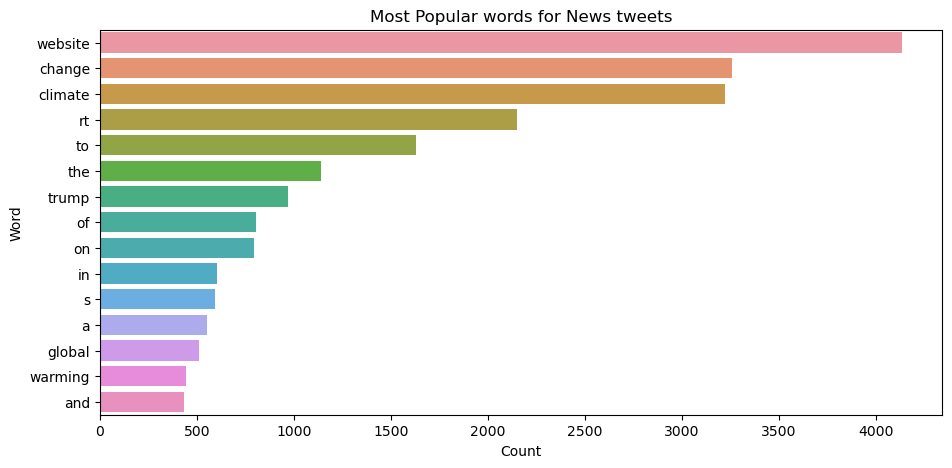

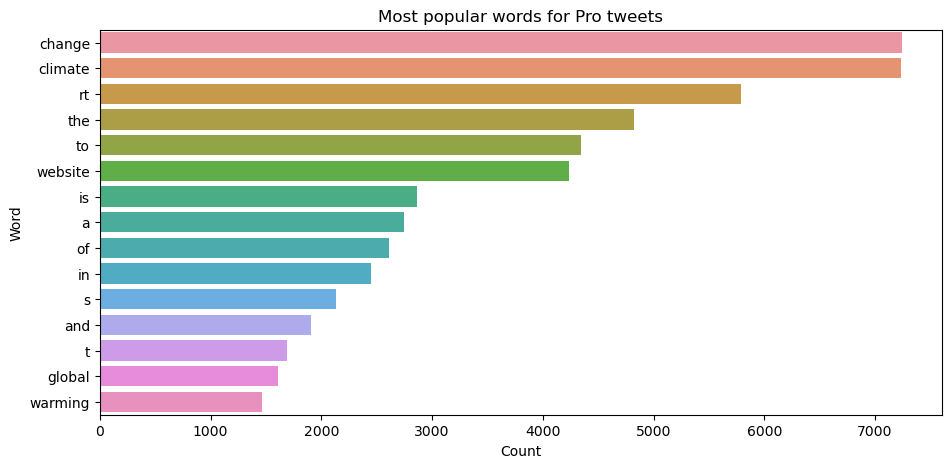

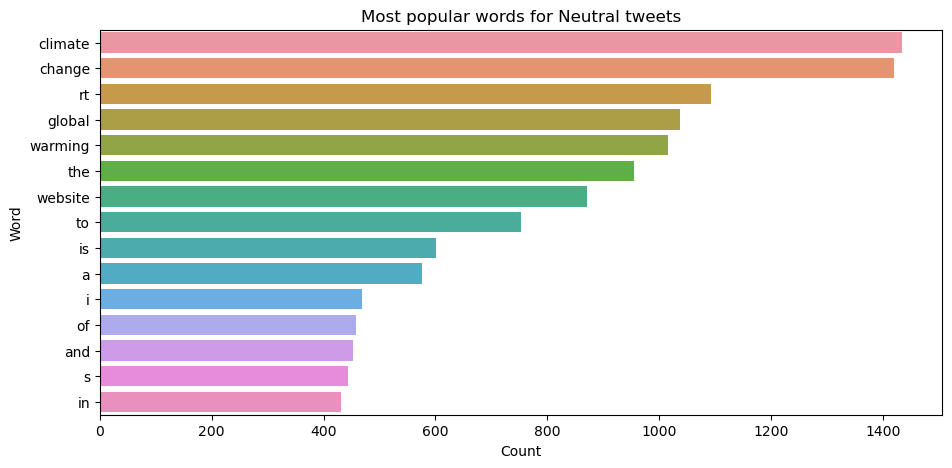

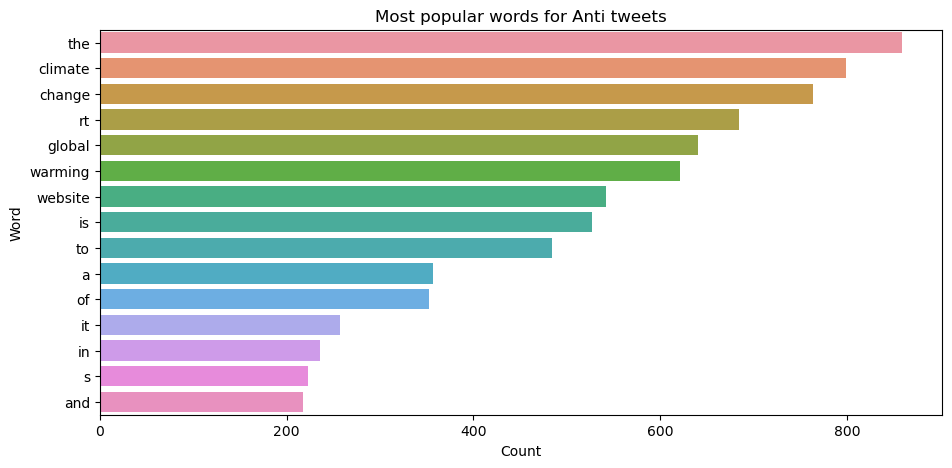

In [57]:
# Visualising each sentiment class according to the count of words
full_title = ['Most Popular words for News tweets',
              'Most popular words for Pro tweets',
              'Most popular words for Neutral tweets',
              'Most popular words for Anti tweets']

tweet_list = [news_tweets, pro_tweets,
              neutral_tweets, anti_tweets]

plt.rcParams['figure.figsize'] = [50, 5]

for i, sent in enumerate(tweet_list):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent.split(' '))
    df = pd.DataFrame({'Word': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    ax = sns.barplot(data=df, y='Word', x='Count')
    plt.title(full_title[i])
    plt.show()

In [58]:
news_tweets = ' '.join(tweets_df.loc[tweets_df['sentiment'] == 2, 'cleaned_tweets'])
pro_tweets = ' '.join(tweets_df.loc[tweets_df['sentiment'] == 1, 'cleaned_tweets'])
neutral_tweets = ' '.join(tweets_df.loc[tweets_df['sentiment'] == 0, 'cleaned_tweets'])
anti_tweets = ' '.join(tweets_df.loc[tweets_df['sentiment'] == -1, 'cleaned_tweets'])

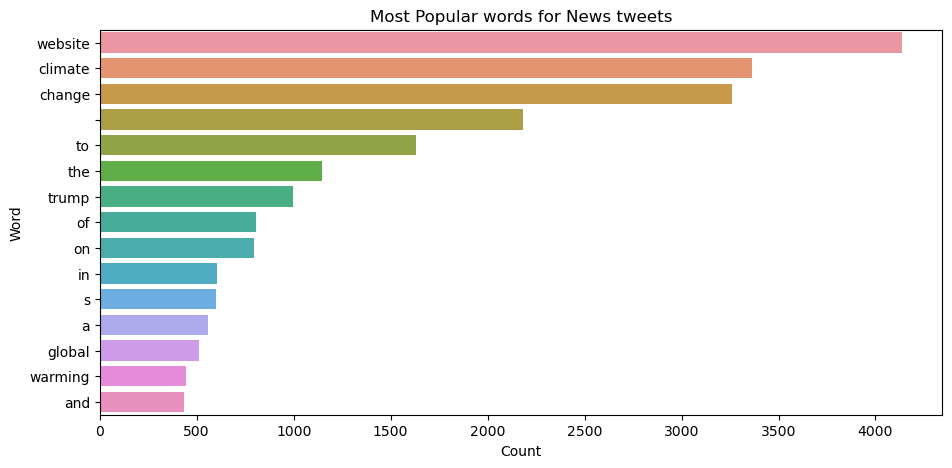

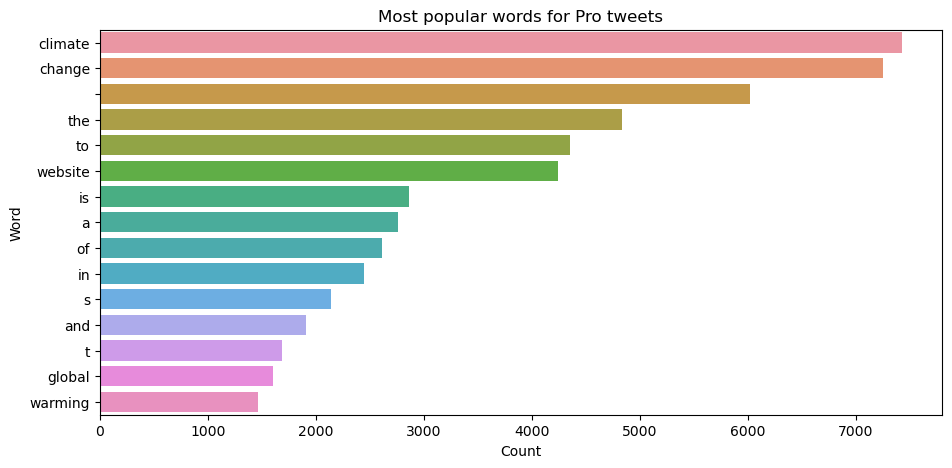

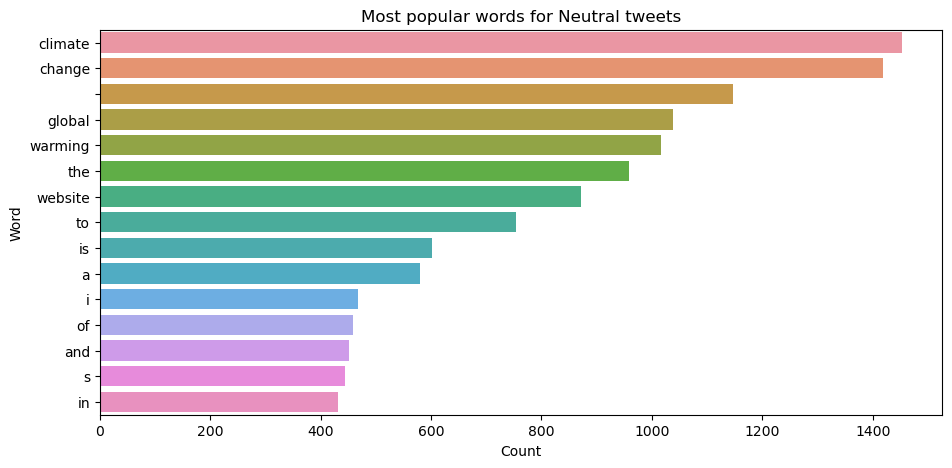

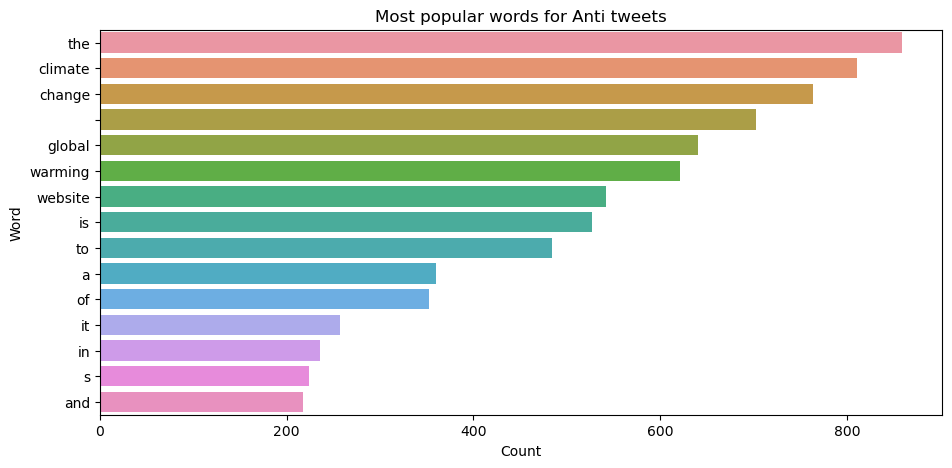

In [59]:
# Visualising each sentiment class according to the count of words
full_title = ['Most Popular words for News tweets',
              'Most popular words for Pro tweets',
              'Most popular words for Neutral tweets',
              'Most popular words for Anti tweets']

tweet_list = [news_tweets, pro_tweets,
              neutral_tweets, anti_tweets]

plt.rcParams['figure.figsize'] = [50, 5]

for i, sent in enumerate(tweet_list):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent.split(' '))
    df = pd.DataFrame({'Word': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    ax = sns.barplot(data=df, y='Word', x='Count')
    plt.title(full_title[i])
    plt.show()

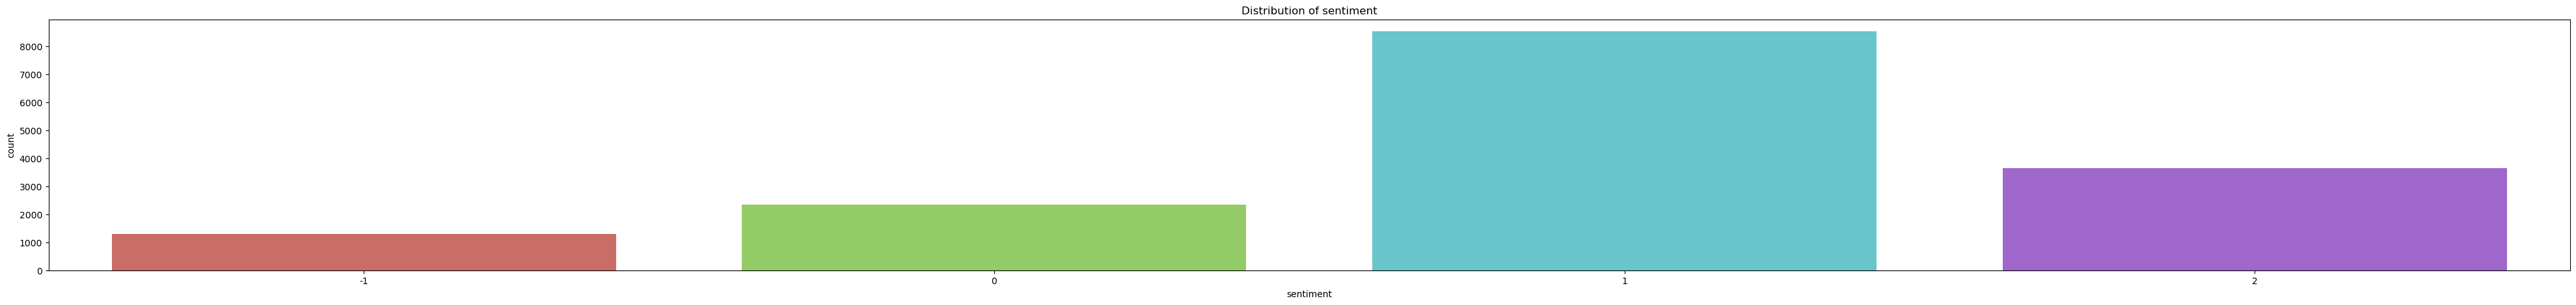

In [61]:
sns.countplot(x = 'sentiment', data = tweets_df, palette="hls")
plt.title("Distribution of sentiment");

# Data Preprocessing

Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

Merging the train and test dataset

In [65]:
# Merging both the data sets
merged_df = Train_df.append(Test_df, 
                             ignore_index=True,
                             sort=False)
merged_df

,sentiment,message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
...,...,...,...
26360,NaN,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714
26361,NaN,2016: the year climate change came home: Durin...,875167
26362,NaN,RT @loop_vanuatu: Pacific countries positive a...,78329
26363,NaN,"RT @xanria_00018: You’re so hot, you must be t...",867455


In [68]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26365 entries, 0 to 26364
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sentiment  15819 non-null  float64
 1   message    26365 non-null  object 
 2   tweetid    26365 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 618.1+ KB


In [70]:
merged_df.isnull()

,sentiment,message,tweetid
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
26360,True,False,False
26361,True,False,False
26362,True,False,False
26363,True,False,False


In [71]:
merged_df.isnull().sum()

sentiment    10546
message          0
tweetid          0
dtype: int64

In [75]:
merged_df.dropna()

,sentiment,message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
...,...,...,...
15814,1.0,RT @ezlusztig: They took down the material on ...,22001
15815,2.0,RT @washingtonpost: How climate change could b...,17856
15816,0.0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1.0,RT @sara8smiles: Hey liberals the climate chan...,819732


Removing HTMLs

In [81]:
from html import unescape
# Created a new column 'clean_message' containing the tweets with HTML entities removed
merged_df['clean_message'] = merged_df['message'].apply(lambda x: unescape(x))
merged_df.head()

,sentiment,message,tweetid,clean_message,filtered_message,filtered
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,PolySciMajor EPA chief doesn't think carbon di...,PolySciMajor EPA chief doesn't think carbon di...,PolySciMajor EPA chief doesn't think carbon di...
1,1.0,It's not like we lack evidence of anthropogeni...,126103,It's not like we lack evidence of anthropogeni...,It's not like we lack evidence of anthropogeni...,It's not like we lack evidence of anthropogeni...
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,RT @RawStory: Researchers say we have three ye...,RT @RawStory: Researchers say we have three ye...,RT @RawStory: Researchers say we have three ye...
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,#TodayinMaker# WIRED : 2016 was a pivotal year...,#TodayinMaker# WIRED : 2016 was a pivotal year...,#TodayinMaker# WIRED : 2016 was a pivotal year...
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...","RT @SoyNovioDeTodas: It's 2016, and a racist, ...","RT @SoyNovioDeTodas: It's 2016, and a racist, ..."


In [83]:
merged_df = merged_df.drop(columns=['filtered_message', 'filtered'])

In [85]:
merged_df['clean_message'] = merged_df['clean_message'].apply(lambda x: x.lower())
merged_df.head()

,sentiment,message,tweetid,clean_message
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor epa chief doesn't think carbon di...
1,1.0,It's not like we lack evidence of anthropogeni...,126103,it's not like we lack evidence of anthropogeni...
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,rt @rawstory: researchers say we have three ye...
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,#todayinmaker# wired : 2016 was a pivotal year...
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"rt @soynoviodetodas: it's 2016, and a racist, ..."


In [86]:
# Creating token for the clean tweets
merged_df['token'] = merged_df['clean_message'].apply(lambda x: word_tokenize(x))

## Fully formated tweets & there tokens
merged_df.head()

,sentiment,message,tweetid,clean_message,token
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor epa chief doesn't think carbon di...,"[polyscimajor, epa, chief, does, n't, think, c..."
1,1.0,It's not like we lack evidence of anthropogeni...,126103,it's not like we lack evidence of anthropogeni...,"[it, 's, not, like, we, lack, evidence, of, an..."
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,rt @rawstory: researchers say we have three ye...,"[rt, @, rawstory, :, researchers, say, we, hav..."
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,#todayinmaker# wired : 2016 was a pivotal year...,"[#, todayinmaker, #, wired, :, 2016, was, a, p..."
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"rt @soynoviodetodas: it's 2016, and a racist, ...","[rt, @, soynoviodetodas, :, it, 's, 2016, ,, a..."


In [89]:
# Importing stop words from NLTK corpus for english language
stop_words = set(stopwords.words('english'))

In [91]:
# Created new columns of tokens without stop words
merged_df['token_filtered'] = merged_df['token'
                                               ].apply(lambda x:[word for word in x if not word in stop_words])

# Tokenized columns with stop words and without stop words
merged_df[['token', 'token_filtered']].head()

,token,token_filtered
0,"[polyscimajor, epa, chief, does, n't, think, c...","[polyscimajor, epa, chief, n't, think, carbon,..."
1,"[it, 's, not, like, we, lack, evidence, of, an...","['s, like, lack, evidence, anthropogenic, glob..."
2,"[rt, @, rawstory, :, researchers, say, we, hav...","[rt, @, rawstory, :, researchers, say, three, ..."
3,"[#, todayinmaker, #, wired, :, 2016, was, a, p...","[#, todayinmaker, #, wired, :, 2016, pivotal, ..."
4,"[rt, @, soynoviodetodas, :, it, 's, 2016, ,, a...","[rt, @, soynoviodetodas, :, 's, 2016, ,, racis..."


In [92]:
# Created one more columns tweet_stemmed
stemming = PorterStemmer()
merged_df['tweet_stemmed'] = merged_df['token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
merged_df.head()

,sentiment,message,tweetid,clean_message,token,token_filtered,tweet_stemmed
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor epa chief doesn't think carbon di...,"[polyscimajor, epa, chief, does, n't, think, c...","[polyscimajor, epa, chief, n't, think, carbon,...",polyscimajor epa chief n't think carbon dioxid...
1,1.0,It's not like we lack evidence of anthropogeni...,126103,it's not like we lack evidence of anthropogeni...,"[it, 's, not, like, we, lack, evidence, of, an...","['s, like, lack, evidence, anthropogenic, glob...",'s like lack evid anthropogen global warm
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,rt @rawstory: researchers say we have three ye...,"[rt, @, rawstory, :, researchers, say, we, hav...","[rt, @, rawstory, :, researchers, say, three, ...",rt @ rawstori : research say three year act cl...
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,#todayinmaker# wired : 2016 was a pivotal year...,"[#, todayinmaker, #, wired, :, 2016, was, a, p...","[#, todayinmaker, #, wired, :, 2016, pivotal, ...",# todayinmak # wire : 2016 pivot year war clim...
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"rt @soynoviodetodas: it's 2016, and a racist, ...","[rt, @, soynoviodetodas, :, it, 's, 2016, ,, a...","[rt, @, soynoviodetodas, :, 's, 2016, ,, racis...","rt @ soynoviodetoda : 's 2016 , racist , sexis..."


# Feature Engineering

Feature Engineering is the process of creating new features or transforming existing features to improve the performance of a machine-learning model. It involves selecting relevant information from raw data and transforming it into a format that can be easily understood by a model. The goal is to improve model accuracy by providing more meaningful and relevant information.


In [104]:
# Splitting the data into train & test
train_stemmed = merged_df[:15819]
test_stemmed = merged_df[15819:].drop(['sentiment'], axis=1)


In [105]:
# Setting the parameters for the Vectorizer

vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )

In [106]:
# Building a Pipeline for word vectorization
pipe = Pipeline( [('vect', vectorizer)] )

In [107]:
# Fitting & transforming the data
train_vect = pipe.fit_transform(train_stemmed['tweet_stemmed'])
test_vect = pipe.transform(test_stemmed['tweet_stemmed'])

Inspecting the shape of our vectorized data

In [108]:
test_vect.shape

(10546, 126611)

In [109]:
train_vect.shape

(15819, 126611)

# Modeling

This setup is typical for machine learning tasks where text data is vectorized using techniques like TF-IDF or word embeddings before being fed into a model for training. The sentiment labels are then used as the target variable for training a classification model.

In [110]:
print("Shape of train_vect:", train_vect.shape)
print("Shape of Train_df['sentiment']:", Train_df['sentiment'].shape)

Shape of train_vect: (15819, 126611)
Shape of Train_df['sentiment']: (15819,)



Split the dataset into training and validation sets to train and evaluate the model's performance.

In [111]:
# Splitting the data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(train_vect, Train_df['sentiment'],
                                                    test_size = 0.2, random_state=42,
                                                    stratify=Train_df['sentiment'])

In [115]:
# These are the different Classification models we will train our data on
# Creating a list of names so we can print metrics for the entire list at once
names = ['Logistic Regression'
         ,'Nearest Neighbors'
         ,'Linear SVC'
         , 'RBF SVC'
         , 'Linear SVM'
         , 'Decision Tree'
         , 'Random Forest'
         ,  'AdaBoost'
]

In [116]:
# These are the different Classification models we will train our data on
# Creating a list of names so we can print metrics for the entire list at once
classifiers = [
    LogisticRegression()
    , KNeighborsClassifier(3)
    , SVC(kernel="linear", C=0.025)
    , SVC(gamma=2, C=1)
    , LinearSVC()
    , DecisionTreeClassifier(max_depth=5)
    , RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
    , AdaBoostClassifier()
]

In [117]:
# Training of models, scoring & appending to results list
results = []

# Creating dictionaries to store evaluation results
models = {}
confusion = {}
class_report = {}

# This will calculate the total training time of each model
for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

# This will show us the status of the training
    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

# This will show us the status of the scoring
    print ('... scoring')
    
# These are our evaluation measures
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='macro')
    recall    = metrics.recall_score(y_train, y_pred, average='macro')

    f1        = metrics.f1_score(y_train, y_pred, average='macro')
    f1_test   = metrics.f1_score(y_test, y_pred_test, average='macro')

# Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision,
                    recall, f1, f1_test, run_time.best])

# Creating a dataframe of the results to view easily
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy',
                                         'Precision', 'Recall', 'F1 Train',
                                         'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

Fitting Logistic Regression model...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Linear SVC model...
... predicting
... scoring
Fitting RBF SVC model...
... predicting
... scoring
Fitting Linear SVM model...
... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting AdaBoost model...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classifi

... predicting
... scoring


In [118]:
# Viewing the results in a dataframe
results.sort_values('F1 Test', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Linear SVM,0.999842,0.999723,0.999734,0.999728,0.653642,2.637131
Logistic Regression,0.999447,0.999346,0.998684,0.999015,0.649786,9.073931
Linear SVC,0.827420,0.897360,0.681862,0.740488,0.554446,29.630730
AdaBoost,0.646464,0.636470,0.500647,0.536056,0.520234,102.852678
Decision Tree,0.608850,0.659978,0.392743,0.411174,0.411975,2.257133
Nearest Neighbors,0.510628,0.648726,0.561284,0.503866,0.342822,0.002066
RBF SVC,0.999842,0.999831,0.999626,0.999728,0.254460,76.829914
Random Forest,0.539234,0.134808,0.250000,0.175163,0.175154,0.038966


Observations:

The RBF & Adaboost models took long the longest to train but didn't perform well on the F1 test.

All other models were trained relatively fast in comparison to the RBF & Adaboost.

From the results table & bar chart, we can see the models that perform best are the Logistic Regression & Linear Support Vector Machines(SVM). We will now try & improve on these two models.

# Tuning the chosen models

To improve our models, we will use Cross-validation & Grid Search methods

In [119]:
kfold = StratifiedKFold( n_splits = 150)

# Linear SVC Model

In [120]:
# Linear SVC model
#Set the parameters according to the first run output (C = 0.09)
param_grid2 = {'C': [0.01, 0.03, 0.06, 0.09]}

# Grid Search on the Linear SVC model
gs_sv = GridSearchCV(LinearSVC(), param_grid = [param_grid2], 
                     verbose = 1, cv = kfold, n_jobs = -1)

# Fitting the model to our data
gs_sv.fit(X_train, y_train)

# Find the best estimator
gs_sv_best = gs_sv.best_estimator_

# Print the best parameters
print(gs_sv.best_params_)

# Print the best score
print(gs_sv.best_score_)

Fitting 150 folds for each of 4 candidates, totalling 600 fits
{'C': 0.09}
0.7510980392156862


In [121]:
# Linear SVC model
#Set the parameters according to the first run output (C = 0.09)
param_grid2 = {'C': [0.01, 0.03, 0.06, 0.09]}

# Grid Search on the Linear SVC model
gs_sv = GridSearchCV(LinearSVC(), param_grid = [param_grid2], 
                     verbose = 1, cv = kfold, n_jobs = -1)

# Fitting the model to our data
gs_sv.fit(X_train, y_train)

# Find the best estimator
gs_sv_best = gs_sv.best_estimator_

# Print the best parameters
print(gs_sv.best_params_)

# Print the best score
print(gs_sv.best_score_)

Fitting 150 folds for each of 4 candidates, totalling 600 fits
{'C': 0.09}
0.7510980392156862


# Logistic Regression Model

In [123]:
# Logistic Regression model
lr = LogisticRegression(class_weight='balanced')
'''The balanced class weight automatically balances data based on the label frequency'''

#Set the parameters according to the first run output (C = 0.09)
lr2_param = {
    'multi_class':[('ovr')],
    'penalty':['l2'],
    'dual':[False],
    'C':[5]   
    }

# Grid Search on the Logistic Regression model
lr_CV = GridSearchCV(lr, param_grid=[lr2_param],
                     cv=kfold, n_jobs=-1, verbose=1)

#  Fitting the model to our data
lr_CV.fit(train_vect, Train_df['sentiment'])

# Print the best parameters
print(lr_CV.best_params_)

# Find the best estimator
logi_best = lr_CV.best_estimator_

# Print the best score
print(lr_CV.best_score_)

Fitting 150 folds for each of 1 candidates, totalling 150 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{'C': 5, 'dual': False, 'multi_class': 'ovr', 'penalty': 'l2'}
0.7571979634621144


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [125]:
# Building Logistic Regression model with best parameters
lg_reg = LogisticRegression(class_weight='balanced', multi_class=('ovr'), 
                            penalty='l2', dual=False, C=5)

# Training the model on the whole training dataset
lg_reg.fit(train_vect, Train_df['sentiment'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression(C=5, class_weight='balanced', multi_class='ovr')

# Combine Model Predictions Into Ensemble Predictions

In [128]:
# create the ensemble model
estimators = {('linearSVC', lr_CV), ('logistic', lg_reg)}
ensemble = VotingClassifier(estimators)
ensemble.fit(train_vect, Train_df['sentiment'])

# Checking model perfomance
print('accuracy: {}'.format(metrics.accuracy_score(y_train, y_pred)))
print('precision: {}'.format(metrics.precision_score(y_train, y_pred, average='macro')))
print('recall: {}'.format(metrics.recall_score(y_train, y_pred, average='macro')))
print('f1_score: {}'.format(metrics.f1_score(y_train, y_pred, average='macro')))

Fitting 150 folds for each of 1 candidates, totalling 150 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

accuracy: 0.6464638482813118
precision: 0.6364697414711384
recall: 0.5006469981448918
f1_score: 0.5360558645835901


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Generating a submission file

Now that best our model is tuned, we can make predictions on the unseen test data, generate a submission file & submit to Kaggle.

In [129]:
# Making predictions on the test data set
submission2 = gs_sv.predict(test_vect)

In [131]:
# Appending the prediction results to the test set, in a new column called 'sentiment'
output = pd.DataFrame( data = {'tweetid': Test_df['tweetid'],
                               'sentiment': submission2 })

# Creating a csv file
output.to_csv('submission_final.csv', index = False)